# 3 Виконання

## 3.1 Зчитування файлу та зміна назви стовпців

### Для початку імпортуємо модуль pandas та застосуємо функцію pandas.read_excel для зчитування .xlsx-файлів. Видалимо колонку "Unnamed: 0", оскільки індекси за замовчуванням створюються.

In [325]:
import pandas as pd
import numpy as np
df = pd.read_excel('data/Version 1.xlsx')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.0,84.500000,0.0,1015.666667
1,2013-01-02,7.4,92.000000,2.98,1017.800000
2,2013-01-03,7.166666666666667,87.000000,4.633333333333334,1018.666667
3,2013-01-04,8.666666666666666,71.333333,1.2333333333333334,1017.166667
4,2013-01-05,6.0,86.833333,3.6999999999999997,1016.500000
...,...,...,...,...,...
1467,2016-12-28,17.217391304347824,68.043478,3.547826086956522,1015.565217
1468,2016-12-29,15.238095238095237,87.857143,6.0,1016.904762
1469,2016-12-30,14.095238095238095,89.666667,6.266666666666667,1017.904762
1470,2016-12-31,15.052631578947368,87.000000,7.325,1016.100000


*Зчитування .xlsx-файлу в датафрейм*

### Змінимо назви стовпців.

In [326]:
df.columns = ['Date', 'Mean temperature', 'Humidity',
              'Wind speed', 'Mean pressure']
df

,Date,Mean temperature,Humidity,Wind speed,Mean pressure
0,2013-01-01,10.0,84.500000,0.0,1015.666667
1,2013-01-02,7.4,92.000000,2.98,1017.800000
2,2013-01-03,7.166666666666667,87.000000,4.633333333333334,1018.666667
3,2013-01-04,8.666666666666666,71.333333,1.2333333333333334,1017.166667
4,2013-01-05,6.0,86.833333,3.6999999999999997,1016.500000
...,...,...,...,...,...
1467,2016-12-28,17.217391304347824,68.043478,3.547826086956522,1015.565217
1468,2016-12-29,15.238095238095237,87.857143,6.0,1016.904762
1469,2016-12-30,14.095238095238095,89.666667,6.266666666666667,1017.904762
1470,2016-12-31,15.052631578947368,87.000000,7.325,1016.100000


*Зміна назв стовпців*

## 3.2 Знаходження проблем з даними та виконання попередньої обробки даних для усунення цих проблем

### Перевіримо типи даних в стовпцях.

In [327]:
df.dtypes

Date                 object
Mean temperature     object
Humidity            float64
Wind speed           object
Mean pressure       float64
dtype: object

*Типи даних*

### Приведемо всі типи в датафреймі в тип object.

In [328]:
df = df.astype('object')

*Приведення до типу object*

### Перевіримо, чи є пропущенні значення у кожному стовпці. для цього застосуємо метод isna, який повертає для кожного стовпця вектор булевих значень, що позначають, чи елемент пустий. Далі застосуємо метод any, для того щоб дізнатися, чи є хоча б одне пропущене значення.

In [329]:
df.isna().any()

Date                False
Mean temperature     True
Humidity             True
Wind speed           True
Mean pressure        True
dtype: bool

*Інформація про присутність пустих значень у стовпцях*

### Розберемося з колонкою дат. При роботі я побачив цікаву деталь, що застосувавши pandas.date_range я отримував 1462 рядки, а в колонці дат рядків 1472.

In [330]:
r = pd.date_range('2013', '2017')
print(f'{df["Date"].size} vs {len(r)}')

1472 vs 1462


*Підозра на наявність дублікатів в датах*

### Приберемо дублікати та перевіремо ще раз.

In [331]:
df.drop_duplicates(subset=['Date'], inplace=True)
print(f'{df["Date"].size} vs {len(r)}')
df['Date'] = r

1462 vs 1462


*Прибирання дублікатів*

### У стовпцях з числами можуть бути символи, що не відповідають загальному виду числа. Приберемо їх на пусті клітинки за допомогою регулярних виразів.

### Пояснимо регулярний вираз. Його основу складає дана частина: "[+-]?([0-9]*[.])?[0-9]+". Вона перевіряє рядок на те, що це або int, або float. Далі треба застосувати інверсію умови, тобто: (.(?!(умова))).

### У кінці приведемо усі стовпчики до типу float64.

In [332]:
df.replace(to_replace=r'^(.(?!([+-]?([0-9]*[.])?[0-9]+)))*$',
           value=np.nan, regex=True, inplace=True)
df.iloc[:, 1:] = df.iloc[:, 1:].astype('float64')
df.dtypes

/tmp/ipykernel_7675/4292456759.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1:] = df.iloc[:, 1:].astype('float64')


Date                datetime64[ns]
Mean temperature           float64
Humidity                   float64
Wind speed                 float64
Mean pressure              float64
dtype: object

*Заміна невідповідних клітинок у стовпчиках на -1, приведення типів до float64*

### Заповнимо пусті значення на середнє значення для кожного стовпчика відповідно. Застосуємо метод fillna.

In [333]:
for col in df.columns[1:]:
    df[col].fillna(df[col].mean(), inplace=True)
df.isna().any()

Date                False
Mean temperature    False
Humidity            False
Wind speed          False
Mean pressure       False
dtype: bool

*Заміна пустих значень на середнє для кожного стовпчика*

### Округлимо до сотих значення. Застосуємо метод round.

In [334]:
df.iloc[:, 1:] = df.iloc[:, 1:].round(2)
df

,Date,Mean temperature,Humidity,Wind speed,Mean pressure
0,2013-01-01,10.00,84.50,0.00,1015.67
1,2013-01-02,7.40,92.00,2.98,1017.80
2,2013-01-03,7.17,87.00,4.63,1018.67
3,2013-01-04,8.67,71.33,1.23,1017.17
4,2013-01-05,6.00,86.83,3.70,1016.50
...,...,...,...,...,...
1467,2016-12-28,17.22,68.04,3.55,1015.57
1468,2016-12-29,15.24,87.86,6.00,1016.90
1469,2016-12-30,14.10,89.67,6.27,1017.90
1470,2016-12-31,15.05,87.00,7.32,1016.10


*Округлення чисел у датафреймі*

### Зробимо колонку дат індексом за допомогою методу set_index.

In [335]:
df.set_index('Date', inplace=True)
df

,Mean temperature,Humidity,Wind speed,Mean pressure
Date,,,,
2013-01-01,10.00,84.50,0.00,1015.67
2013-01-02,7.40,92.00,2.98,1017.80
2013-01-03,7.17,87.00,4.63,1018.67
2013-01-04,8.67,71.33,1.23,1017.17
2013-01-05,6.00,86.83,3.70,1016.50
...,...,...,...,...
2016-12-28,17.22,68.04,3.55,1015.57
2016-12-29,15.24,87.86,6.00,1016.90
2016-12-30,14.10,89.67,6.27,1017.90


*Приведення колонки дат до індексу*

### Перевіримо, чи є аномальні дані за допомогою графіків. Побачимо, що вони є і треба їх прибрати.

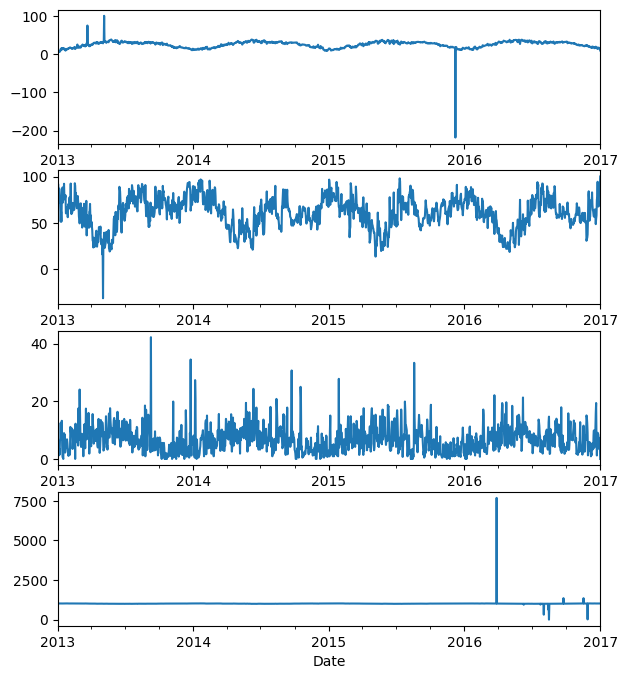

In [336]:
import matplotlib.pyplot as plt
def plot_cols(df):
    fig, axes = plt.subplots(4, 1, figsize=(7, 8), squeeze=False)
    df.iloc[:, 0].plot(ax=axes[0][0])
    df.iloc[:, 1].plot(ax=axes[1][0])
    df.iloc[:, 2].plot(ax=axes[2][0])
    df.iloc[:, 3].plot(ax=axes[3][0])
plot_cols(df)

*Графіки стовпчиків*

### Виведемо для кожної колонки максимальне та мінімальне значення.

In [337]:
pd.concat([df.max(), df.min()], axis=1) 

,0,1
Mean temperature,100.75,-218.43
Humidity,100.00,-31.57
Wind speed,42.22,0.00
Mean pressure,7679.33,-3.04


*Мінімальні та максимальні значення*

### За допомогою функції zscore обрахуємо значенння відносно середнього та стандартного відхилення для кожної колонки. Оскільки напрямок значення не має, тов візьмемо модуль та потім порівняємо з певним віхиленням.

In [338]:
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df = df[(np.abs(stats.zscore(df.iloc[:, 3])) < 1)]

*Видалення аномалій*

### Побудуємо для наочності графіки. Як бачимо кількість аномалій зменшилася.

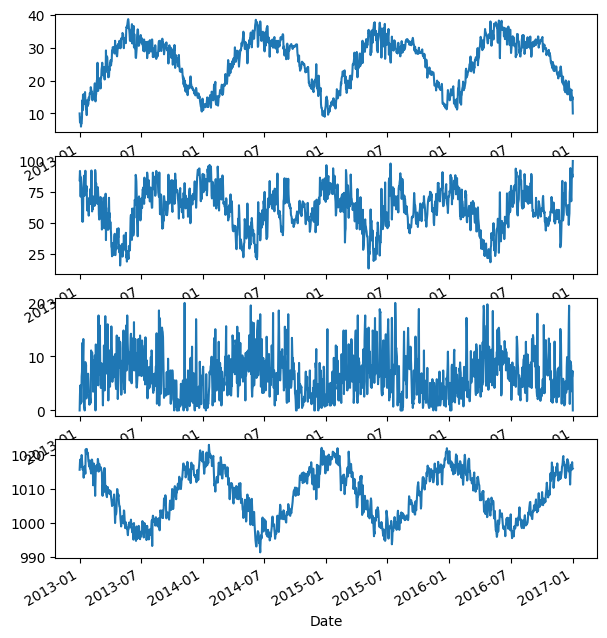

In [339]:
plot_cols(df)

*Графіки стовпчиків*

### Експортуємо датафрейм до .xlsx-файлу за допомогою методу to_excel.

In [340]:
name = 'result.xlsx'
df.to_excel(name)
x1 = pd.ExcelFile(name)
x1.parse('Sheet1')

,Date,Mean temperature,Humidity,Wind speed,Mean pressure
0,2013-01-01,10.00,84.50,0.00,1015.67
1,2013-01-02,7.40,92.00,2.98,1017.80
2,2013-01-03,7.17,87.00,4.63,1018.67
3,2013-01-04,8.67,71.33,1.23,1017.17
4,2013-01-05,6.00,86.83,3.70,1016.50
...,...,...,...,...,...
1430,2016-12-28,17.22,68.04,3.55,1015.57
1431,2016-12-29,15.24,87.86,6.00,1016.90
1432,2016-12-30,14.10,89.67,6.27,1017.90
1433,2016-12-31,15.05,87.00,7.32,1016.10


*Збереження датафрейму до .xlsx-файлу*